In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [9]:
# 1. Generate synthetic classification data (2D for visualization)
X, y = make_moons(n_samples=500, noise=0.25, random_state=0)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [10]:
# 2. Train a single decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
acc_tree = tree.score(X_test, y_test)
print("Single Tree Accuracy:", acc_tree)


Single Tree Accuracy: 0.8933333333333333


In [11]:
# 3. Train a bagging classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=0,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
acc_bag = bagging.score(X_test, y_test)
print("Bagging Classifier Accuracy:", acc_bag)

Bagging Classifier Accuracy: 0.8933333333333333


In [12]:
# 4. Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    
    plt.show()


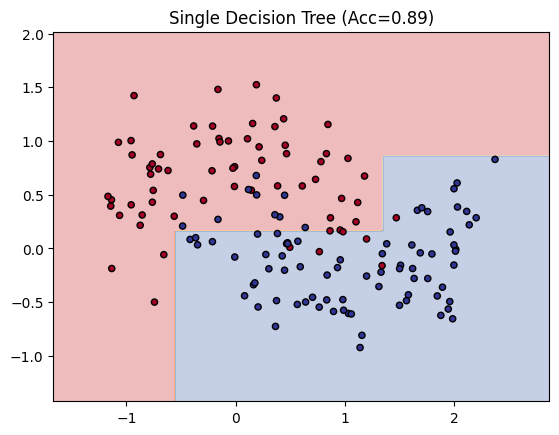

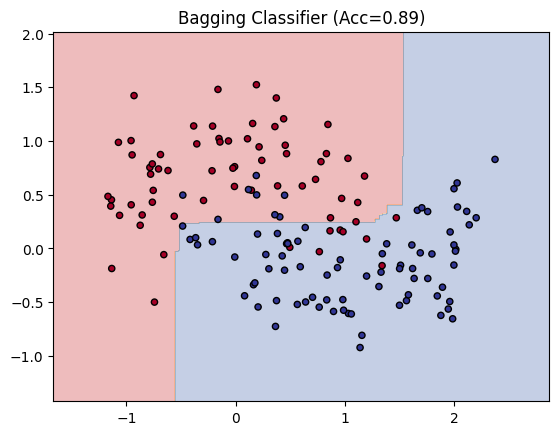

In [15]:
# 5. Plot decision boundaries
plot_decision_boundary(tree, X_test, y_test, f"Single Decision Tree (Acc={acc_tree:.2f})")
plot_decision_boundary(bagging, X_test, y_test, f"Bagging Classifier (Acc={acc_bag:.2f})")
